In [44]:
import os

In [45]:
files = os.listdir('./all')

In [56]:
metrics = {
    "A*" : {
        "Steps" : [],
        "Weight" :  [],
        "Node" :  [],
        "Time" : [],
        "Memory" : [],
        "Path" : [],
    },
    "BFS" : {
        "Steps" : [],
        "Weight" : [],
        "Node" : [],
        "Time" : [],
        "Memory" : [],
        "Path" : [],
        },
    "DFS" : {
        "Steps" : [],
        "Weight" : [],
        "Node" : [],
        "Time" : [],
        "Memory" : [],
        "Path" : [],
        },
    "UCS" : {
        "Steps" : [],
        "Weight" : [],
        "Node" : [],
        "Time" : [],
        "Memory" : [],
        "Path" : [],
        }
}


def extract_row(row):
    row = row.split(',')
    metrics = [(name_value.split(':')[0].strip().split(' ')[0] , name_value.split(':')[1]) for name_value in row]
    return metrics

def add_metrics(type, metric , metrics):
    metrics[type][metric[0]].append(metric[1])  
    return metrics

for file in files:
    with open(os.path.join('./all' , file)) as f:
        lines =  f.readlines()
        lines = [line.strip() for line in lines]
        for i in range(0  , len(lines) , 3):
            type_metrics = lines[i]
            metrics_values = extract_row(lines[i+1])
            path = ("Path" , lines[i+2])
            metrics_values.append(path)
            for metric in metrics_values:
                metrics = add_metrics(type_metrics , metric , metrics)

# metrics


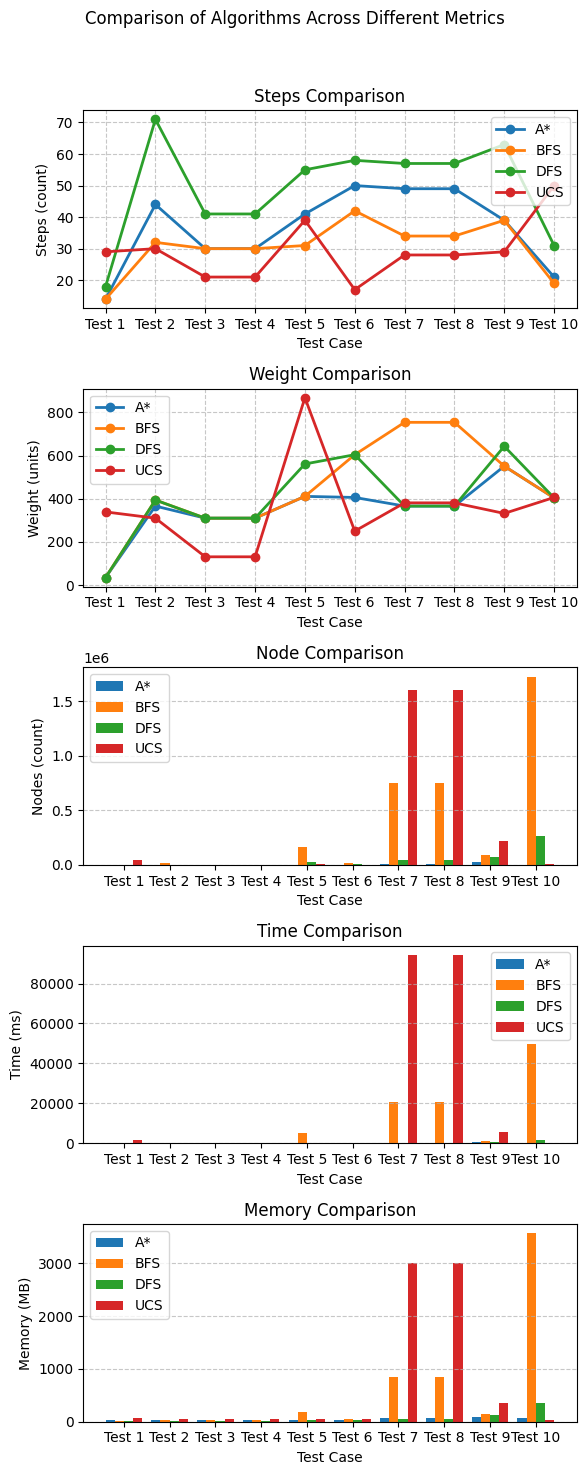

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Các thuật toán và chỉ số để hiển thị
algorithms = ["A*", "BFS", "DFS", "UCS"]
metrics_keys = ["Steps", "Weight", "Node", "Time", "Memory"]
y_labels = {
    "Steps": "Steps (count)",
    "Weight": "Weight (units)",
    "Node": "Nodes (count)",
    "Time": "Time (ms)",
    "Memory": "Memory (MB)"
}

# Số lượng test cases
num_test_cases = len(metrics["A*"]["Steps"])

# Tạo một figure với 5 hàng và 1 cột subplot
fig, axs = plt.subplots(5, 1, figsize=(6, 15))  # 5 hàng và 1 cột
fig.suptitle("Comparison of Algorithms Across Different Metrics")

# Vẽ đường cho 'Steps' và 'Weight', còn lại vẽ biểu đồ cụm
for idx, metric_key in enumerate(metrics_keys):
    ax = axs[idx]  # Chọn subplot theo chỉ số idx
    
    if metric_key in ["Steps", "Weight"]:
        # Biểu đồ đường (line plot) cho Steps và Weight
        for i, algo in enumerate(algorithms):
            data = [float(value) for value in metrics[algo][metric_key]]
            ax.plot(range(1, len(data) + 1), data, label=algo, marker='o', linestyle='-', linewidth=2)
        
        ax.set_title(f"{metric_key} Comparison")
        ax.set_xlabel("Test Case")
        ax.set_ylabel(y_labels[metric_key])
        ax.set_xticks(range(1, num_test_cases + 1))
        ax.set_xticklabels([f"Test {i+1}" for i in range(num_test_cases)])
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.7)

    else:
        # Biểu đồ cụm (clustered bar chart) cho Node, Time, và Memory
        x = np.arange(num_test_cases)  # Vị trí cho các nhóm cột
        width = 0.2  # Độ rộng của từng cột

        for i, algo in enumerate(algorithms):
            data = [float(value) for value in metrics[algo][metric_key]]
            ax.bar(x + i * width, data, width, label=algo)

        ax.set_title(f"{metric_key} Comparison")
        ax.set_xlabel("Test Case")
        ax.set_ylabel(y_labels[metric_key])
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels([f"Test {i+1}" for i in range(num_test_cases)])
        ax.legend()
        ax.grid(True, axis="y", linestyle="--", alpha=0.7)

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Chừa khoảng trống cho tiêu đề chính
plt.show()


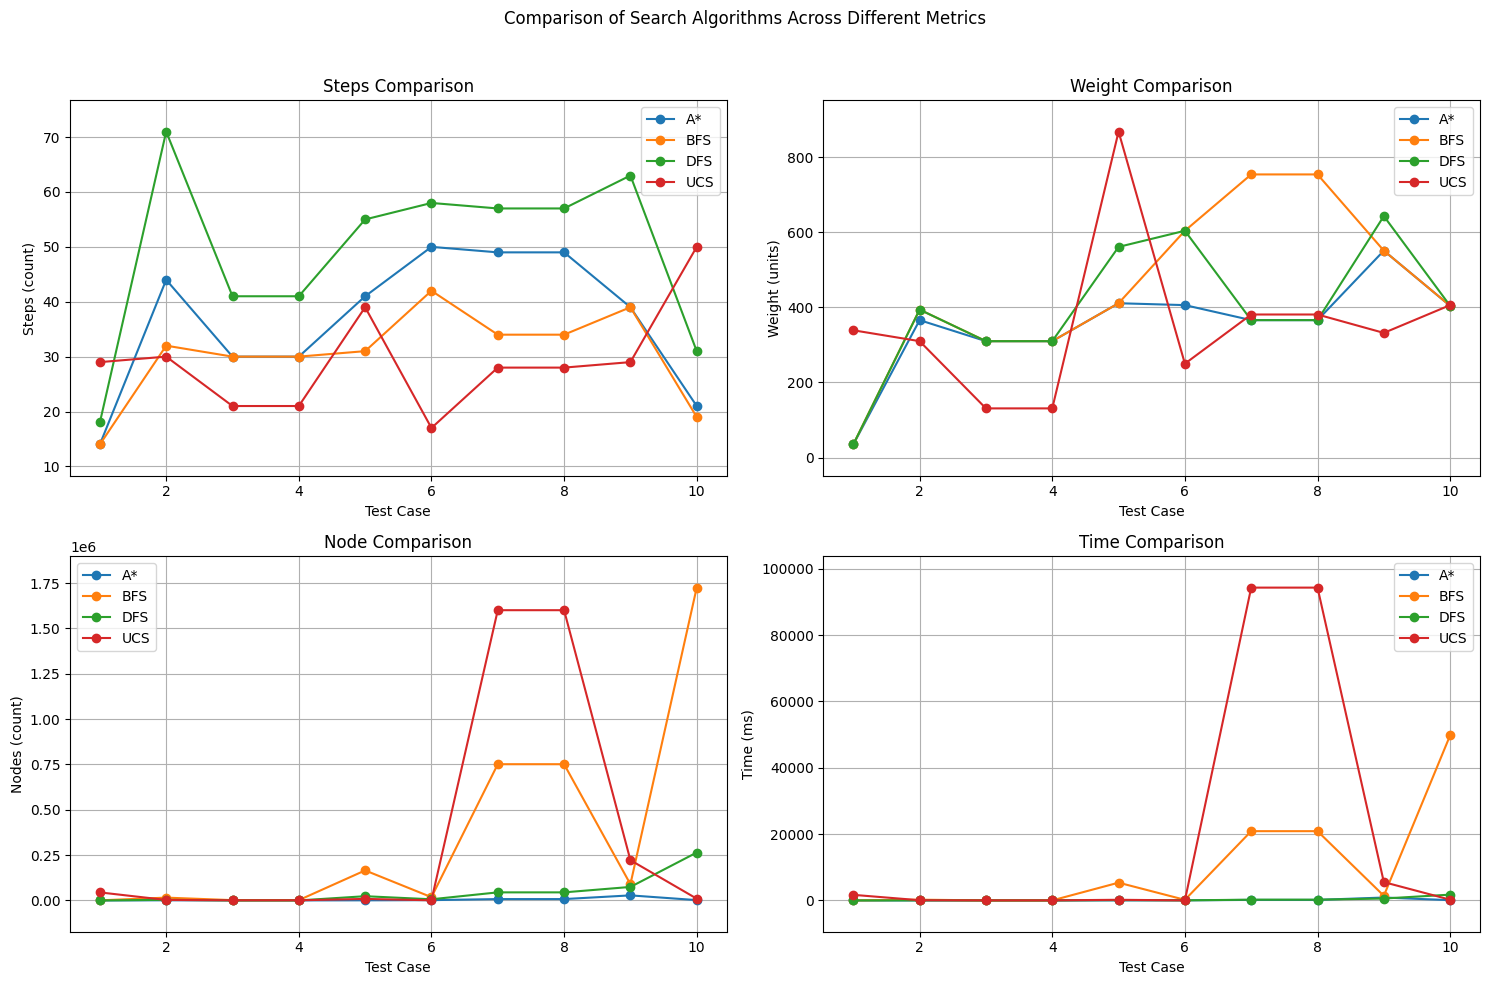

In [51]:
import matplotlib.pyplot as plt

# Các thuật toán và các chỉ số để hiển thị
algorithms = ["A*", "BFS", "DFS", "UCS"]
metrics_keys = ["Steps", "Weight", "Node", "Time", "Memory"]
y_labels = {
    "Steps": "Steps (count)",
    "Weight": "Weight (units)",
    "Node": "Nodes (count)",
    "Time": "Time (ms)",
    "Memory": "Memory (MB)"
}

# Tạo một figure với 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Comparison of Search Algorithms Across Different Metrics")

# Duyệt qua từng chỉ số và vẽ vào từng subplot
for i, metric_key in enumerate(metrics_keys[:-1]):  # Chỉ lấy 4 chỉ số đầu tiên
    ax = axs[i // 2, i % 2]  # Định vị trí của subplot (hàng, cột)

    # Tính giới hạn trục y dựa trên giá trị min và max của dữ liệu, chuyển đổi sang số
    min_value = min(min(float(value) for value in metrics[algo][metric_key]) for algo in algorithms)
    max_value = max(max(float(value) for value in metrics[algo][metric_key]) for algo in algorithms)
    y_range = max_value - min_value
    ax.set_ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)  # Thêm khoảng trống 10% hai đầu
    
    # Vẽ dữ liệu của từng thuật toán trên cùng một subplot
    for algo in algorithms:
        data = [float(value) for value in metrics[algo][metric_key]]
        ax.plot(range(1, len(data) + 1), data, label=algo, marker='o')

    # Cài đặt tiêu đề, nhãn cho trục y với đơn vị và trục x cho từng subplot
    ax.set_title(f"{metric_key} Comparison")
    ax.set_xlabel("Test Case")
    ax.set_ylabel(y_labels[metric_key])
    ax.legend()
    ax.grid(True)

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Chừa khoảng trống cho tiêu đề chính
plt.show()


KeyError: 'Weight'

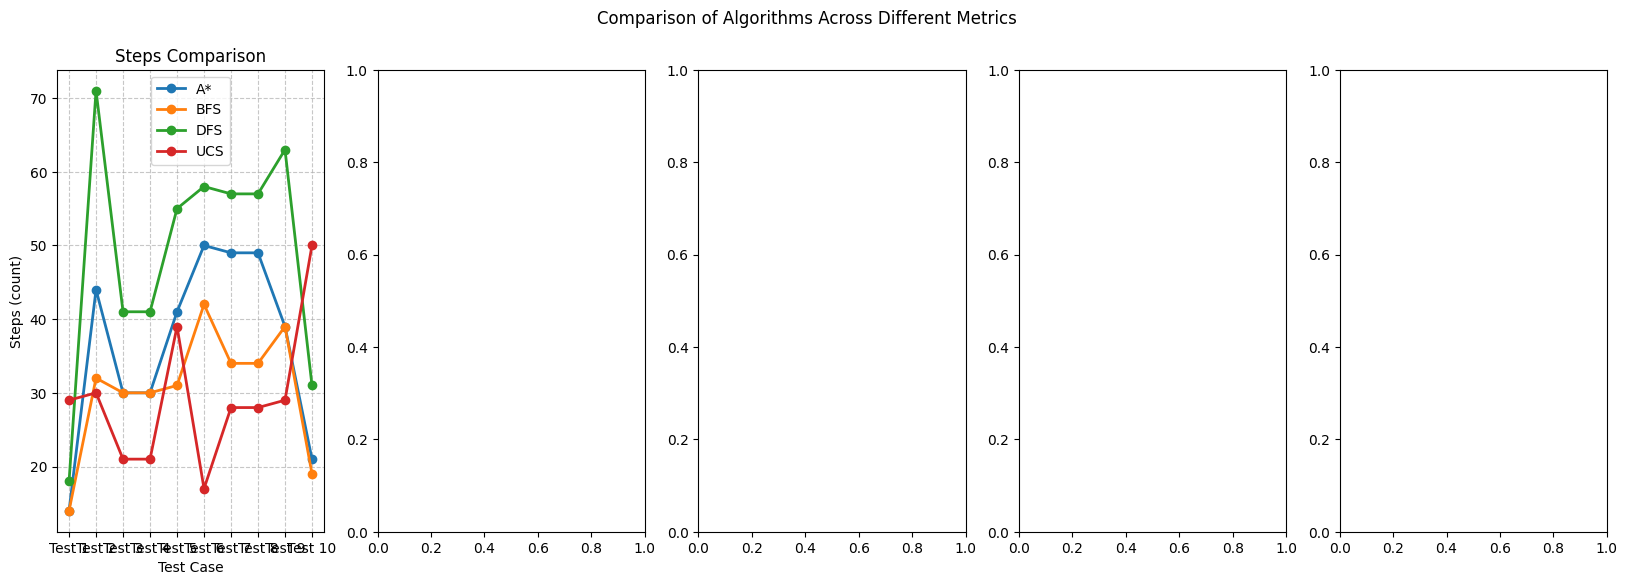

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Các thuật toán và chỉ số để hiển thị
algorithms = ["A*", "BFS", "DFS", "UCS"]
metrics_keys = ["Steps", "Weight", "Node", "Time", "Memory"]
y_labels = {
    "Steps": "Steps (count)",
    "Weight": "Weight (units)",
    "Node": "Nodes (count)",
    "Time": "Time (ms)",
    "Memory": "Memory (MB)"
}

# Số lượng test cases
num_test_cases = len(metrics["A*"]["Steps"])

# Tạo một figure với 1 hàng và 5 cột subplot
fig, axs = plt.subplots(1, 5, figsize=(20, 6))  # 1 hàng và 5 cột
fig.suptitle("Comparison of Algorithms Across Different Metrics")

# Vẽ đường cho 'Steps' và 'Weight', còn lại vẽ biểu đồ cụm
for idx, metric_key in enumerate(metrics_keys):
    ax = axs[idx]  # Chọn subplot theo chỉ số idx
    
    if metric_key in ["Steps", "Weight"]:
        # Biểu đồ đường (line plot) cho Steps và Weight
        for i, algo in enumerate(algorithms):
            data = [float(value) for value in metrics[algo][metric_key]]
            ax.plot(range(1, len(data) + 1), data, label=algo, marker='o', linestyle='-', linewidth=2)
        
        ax.set_title(f"{metric_key} Comparison")
        ax.set_xlabel("Test Case")
        ax.set_ylabel(y_labels[metric_key])
        ax.set_xticks(range(1, num_test_cases + 1))
        ax.set_xticklabels([f"Test {i+1}" for i in range(num_test_cases)])
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.7)

    else:
        # Biểu đồ cụm (clustered bar chart) cho Node, Time, và Memory
        x = np.arange(num_test_cases)  # Vị trí cho các nhóm cột
        width = 0.2  # Độ rộng của từng cột

        for i, algo in enumerate(algorithms):
            data = [float(value) for value in metrics[algo][metric_key]]
            ax.bar(x + i * width, data, width, label=algo)

        ax.set_title(f"{metric_key} Comparison")
        ax.set_xlabel("Test Case")
        ax.set_ylabel(y_labels[metric_key])
        ax.set_xticks(x + width * 1.5)
        ax.set_xticklabels([f"Test {i+1}" for i in range(num_test_cases)])
        ax.legend()
        ax.grid(True, axis="y", linestyle="--", alpha=0.7)

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Chừa khoảng trống cho tiêu đề chính
plt.show()


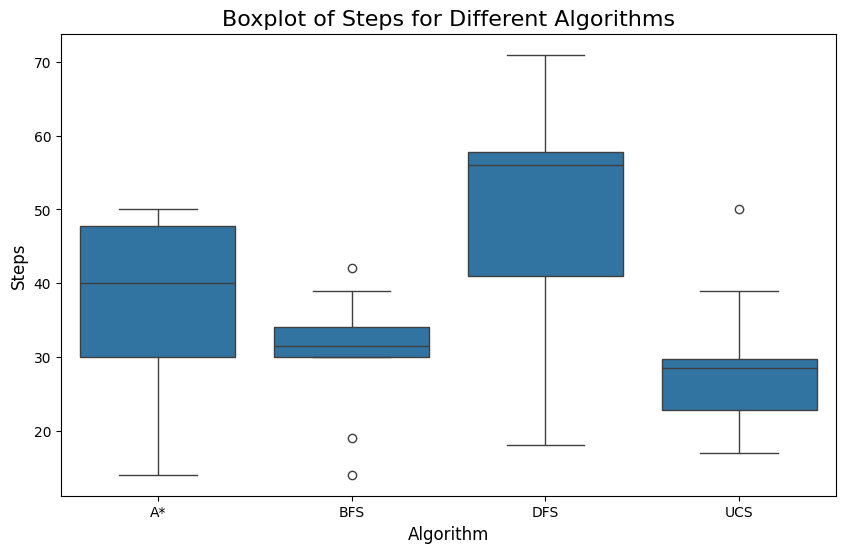

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dữ liệu metrics (dữ liệu gốc đã có sẵn)
metrics = {
    'A*': {'Steps': [14, 44, 30, 30, 41, 50, 49, 49, 39, 21]},
    'BFS': {'Steps': [14, 32, 30, 30, 31, 42, 34, 34, 39, 19]},
    'DFS': {'Steps': [18, 71, 41, 41, 55, 58, 57, 57, 63, 31]},
    'UCS': {'Steps': [29, 30, 21, 21, 39, 17, 28, 28, 29, 50]}
}

# Chuyển dữ liệu metrics thành DataFrame với dạng dài (long format)
df_steps_long = pd.DataFrame({
    'Algorithm': ['A*'] * 10 + ['BFS'] * 10 + ['DFS'] * 10 + ['UCS'] * 10,  # Lặp lại tên thuật toán cho mỗi bước
    'Steps': metrics['A*']['Steps'] + metrics['BFS']['Steps'] + metrics['DFS']['Steps'] + metrics['UCS']['Steps']
})

# Vẽ biểu đồ Boxplot cho số bước (Steps)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Algorithm', y='Steps', data=df_steps_long)
plt.title('Boxplot of Steps for Different Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Steps', fontsize=12)
plt.show()
